#### Amit Das (21BAI1543)

### Seed1.csv

# Part A

#### Load the necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#### Load the dataset

In [111]:
data = pd.read_csv('seed1.csv')

data.head()

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness
0,28395,610.291,28715,190.141097,0.763923,0.988856,0.958027,0.913358
1,28734,638.018,29172,191.272751,0.783968,0.984986,0.887034,0.953861
2,29380,624.110,29690,193.410904,0.778113,0.989559,0.947849,0.908774
3,30008,645.884,30724,195.467062,0.782681,0.976696,0.903936,0.928329
4,30140,620.134,30417,195.896503,0.773098,0.990893,0.984877,0.970516


#### Check for null values in the dataset

In [112]:
data.isnull().sum()

Area             0
Perimeter        0
ConvexArea       0
EquivDiameter    0
Extent           0
Solidity         0
roundness        0
Compactness      0
dtype: int64

### Plot the dataset for better visualization

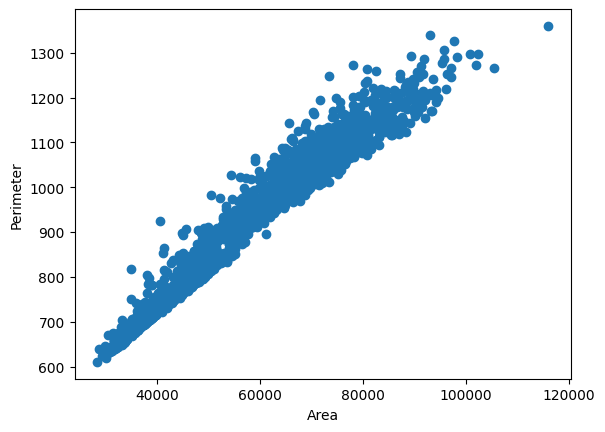

In [113]:
# Area vs Perimeter plot
plt.scatter(data.Area, data.Perimeter)

plt.xlabel('Area')
plt.ylabel('Perimeter')

plt.show()

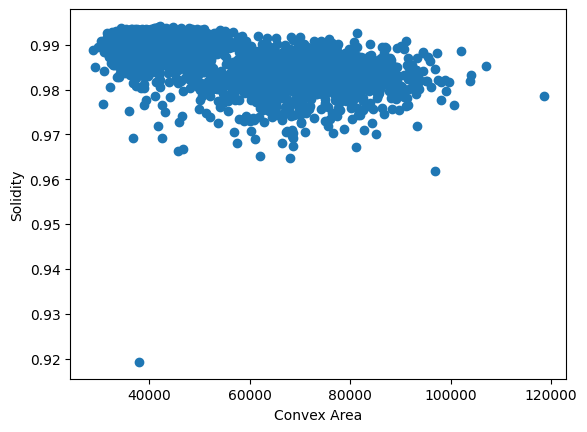

In [114]:
# Area vs Perimeter plot
plt.scatter(data.ConvexArea, data.Solidity)

plt.xlabel('Convex Area')
plt.ylabel('Solidity')

plt.show()

### Normalize the dataset

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit(x).transform(x)

### Apply Clustering Algorithm

We will be using K-means clustering for this dataset

##### Import the library

In [80]:
from sklearn.cluster import KMeans

#### Create an instance of the model

In [105]:
km2 = KMeans(n_clusters = 2, n_init = 'auto')
km3 = KMeans(n_clusters = 3, n_init = 'auto')
km5 = KMeans(n_clusters = 5, n_init = 'auto')

#### Train the model

In [86]:
km2.fit(x_scaled)
km3.fit(x_scaled)
km5.fit(x_scaled)

KMeans(n_clusters=5, n_init='auto')

#### Get the SSE 

In [88]:
print('SSE for 2 groups = ', km2.inertia_)
print('SSE for 3 groups = ', km3.inertia_)
print('SSE for 5 groups = ', km5.inertia_)

SSE for 2 groups =  8655.724789219235
SSE for 3 groups =  6968.182439991464
SSE for 5 groups =  5563.205539942744


# Part B

#### Pick features with high standard deviation

In [117]:
x_new2 = x_scaled[:, :2]

#### Create another instance of the model

In [119]:
km21 = KMeans(n_clusters = 2, n_init = 'auto')
km31 = KMeans(n_clusters = 3, n_init = 'auto')
km51 = KMeans(n_clusters = 5, n_init = 'auto')

#### Train the model

In [120]:
km21.fit(x_new2)
km31.fit(x_new2)
km51.fit(x_new2)

KMeans(n_clusters=5, n_init='auto')

### Get the SSE

In [122]:
print('SSE for 2 groups = ', km21.inertia_)
print('SSE for 3 groups = ', km31.inertia_)
print('SSE for 5 groups = ', km51.inertia_)

SSE for 2 groups =  1078.0494897095452
SSE for 3 groups =  626.9089525512861
SSE for 5 groups =  281.0553515390922


# Part C

### Apply PCA on the data

##### Load the library

In [101]:
from sklearn.decomposition import PCA

#### Create an instance

In [103]:
pca = PCA(n_components = 2)

#### Fit the data

In [104]:
x_new = pca.fit_transform(x_scaled)

#### Create another instance of K-Means

In [107]:
km5_new = KMeans(n_clusters = 5, n_init = 'auto')

#### Train the model

In [108]:
km5_new.fit(x_new)

KMeans(n_clusters=5, n_init='auto')

#### Get the SSE

In [109]:
print('SSE after applying PCA with 5 varieties : ', km5_new.inertia_)

SSE after applying PCA with 5 varieties :  2668.266749043428
